In [1]:
import torch
from tqdm import tqdm
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

# transforms images to a PyTorch tensor
tensor_transform = transforms.ToTensor()

# download MNIST Dataset
dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=tensor_transform
)

# initialize dataloader
loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=32,
    shuffle=True
)

In [2]:
# creating a PyTorch nn network 
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        encoded = self.encoder(x)
        return encoded


In [3]:
# Model Initialization
model = AE()

# validation with MSE loss
loss_function = torch.nn.MSELoss()

# Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-8)

In [4]:
epochs = 40
outputs = []
losses = []
model.train()

for epoch in tqdm(range(epochs)):
    for image, _ in loader:
        
        #print(image.shape)  ->    #! try out gpu again
        #break
        
        # evaluate auto encoder
        image = image.reshape(-1, 28 * 28)
        reconstructed = model(image)

        # calculate loss
        loss = loss_function(reconstructed, image)

        # update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # store training data
        losses.append(loss.item())
        outputs.append((epochs, image, reconstructed))

torch.save(model.state_dict(), "autoencoder.pth")

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [07:43<00:00, 11.59s/it]


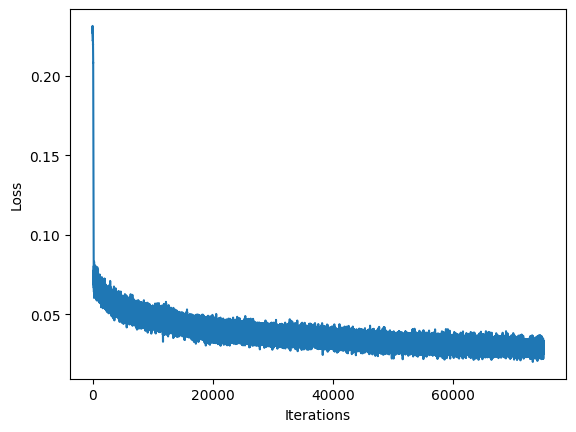

In [5]:
# plot loss
plt.figure()
plt.plot(losses)
plt.style.use("fivethirtyeight")
plt.xlabel("Iterations"); plt.ylabel("Loss");

In [6]:
n=-1

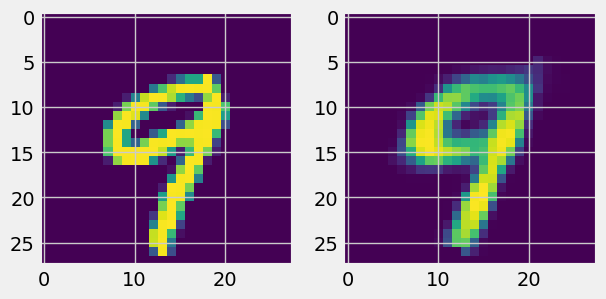

In [32]:
n += 1
   
fig, ax = plt.subplots(1,2)

item = image[n].reshape(-1, 28, 28)
ax[0].imshow(item[0])

item = reconstructed[n].reshape(-1, 28, 28).detach().numpy()
ax[1].imshow(item[0]);

In [123]:
#! this cell does not work yet

model = AE();
torch.load("autoencoder.pth", model.state_dict())

images1 = []
reconstructed1 = []

for image, _ in loader:
        image = image.reshape(-1, 28 * 28)
        reconstructed = model(image)

        images1.append(image)
        reconstructed1.append(reconstructed)